In [1]:
import os
from ape import networks
import pandas as pd
import matplotlib.pyplot as plt
from controllers.CreditGuild.GuildTokenHolders import fetch_holders
from controllers.CreditGuild.ActiveLendingTerms import fetch_terms_and_debt, fetch_users_stakes


guild_token_address = "0xb8ae64f191f829fc00a4e923d460a8f2e0ba3978"
top_addresses = [
    {"address": "0xa8c42bbb0648511cc9004fbdcf0fa365088f862b", "nickname": "Golden Phoenix"},
    {"address": "0x6b0e55f66add3861ffaa1e7137fa659abe530b8d", "nickname": "Hunter"},
    {"address": "0x46822e4246a4a414459a2fda91467ce96408f1bc", "nickname": "Maker"},
    {"address": "0x0092737a698399f35b611b72c461ee59be39b56c", "nickname": "Shadow"},
    {"address": "0x3170bd1144e67e4f146a22a1307c1d10b9f4ab81", "nickname": "Ancient"},
    {"address": "0x7bfee91193d9df2ac0bfe90191d40f23c773c060", "nickname": "Anon (Punk 2498)"},
    {"address": "0x10bf1dcb5ab7860bab1c3320163c6dddf8dcc0e4", "nickname": "0x10bf1dcb5"},
    {"address": "0x432dcbda06e8b296ca29705572d7cb6315ed8bed", "nickname": "0xNigiri"},
    {"address": "0xbdfa4f4492dd7b7cf211209c4791af8d52bf5c50", "nickname": "bizyugo"},
    {"address": "0xa2cdbd966a50fca31df26c7ac78ecfed1c77c42f", "nickname": "0xa2cdbd966"}
]

top_addresses_df = pd.DataFrame(top_addresses)

holders_data = None

holders_csv_file_path = "data/credit_guild_guild_token_holders.csv"
if os.path.exists(holders_csv_file_path ):
    holders_data = pd.read_csv(holders_csv_file_path, header=0)

with networks.parse_network_choice("arbitrum:mainnet:infura") as provider:
    if holders_data is None:
        str_addresses = [address["address"] for address in top_addresses]
        holders_data = fetch_holders(str_addresses, guild_token_address)
        holders_data.to_csv(holders_csv_file_path, index=False, header=True)

holder_balances = pd.merge(holders_data, top_addresses_df, on="address", how="inner")

In [2]:
terms_debt_csv_file_path = 'data/credit_guild_terms_debt.csv'

terms_data = None
if os.path.exists(terms_debt_csv_file_path):
    terms_data = pd.read_csv(terms_debt_csv_file_path)

with networks.parse_network_choice("arbitrum:mainnet:infura") as provider:
    terms_data = terms_data if not terms_data is None else fetch_terms_and_debt(guild_token_address)
    terms_data.to_csv(terms_debt_csv_file_path, index=False, header=True)

In [3]:
user_stakes_csv_file_path = 'data/credit_guild_user_stakes.csv'

stake_minters = [
    {"surplusGuildMinter": "0xb94aaae7472a694dd959c8497b2f09730391dc52", "creditToken": "0xD5FD8456aa96aAA07c23605e9a8d2ce5f737F145"},
    {"surplusGuildMinter": "0x55ab4c8a5f11f8e62d7822d5aed778784df12afd", "creditToken": "0xaFBe44E79E9affB25CEd16D971933219d1d6EC8d"},
    {"surplusGuildMinter": "0x6995aa07b177918423d2127b885b67e7a3cec265", "creditToken": "0x8D8b654E2B6A0289D8f758cBCCc42aB387c67B61"},
    {"surplusGuildMinter": "0x71215ac6faf015aea177675543a8635beb08d183", "creditToken": "0x4139724fCB5E27d9F13Be9928E4436a32d12E00b"},
    {"surplusGuildMinter": "0xaa5bb0ffbfabec29a0df298b4b6a1a8e24cfe17e", "creditToken": "0x2170eea4D493e53e835d59f8aC559D007bC9A527"},
    {"surplusGuildMinter": "0x7c171a82f73e9c030cf9133606d883883c826acb", "creditToken": "0x808831eC837534E28A24097122875A6eE39C6A38"},
    {"surplusGuildMinter": "0x72c0a3d34aabd20db73a38c494f6e6be503f4a5b", "creditToken": "0x63Bebf6E5152ddeF1445e24B456f8128a9Fda7fc"},
    {"surplusGuildMinter": "0x0d81cf2515c02a7cdbd110c41e8dce2bb1983962", "creditToken": "0xb6CC9BbD136Bde153c380a987EF6b365bA9f7669"}
]

merged_staking = pd.merge(terms_data, pd.DataFrame(stake_minters), on="creditToken", how="inner")

users_stakes = None
if os.path.exists(user_stakes_csv_file_path):
    users_stakes = pd.read_csv(user_stakes_csv_file_path, header=0)

with networks.parse_network_choice("arbitrum:mainnet:infura") as provider:
    if users_stakes is None:
        users_stakes = fetch_users_stakes(top_addresses_df, merged_staking, slow=True)
    users_stakes.to_csv(user_stakes_csv_file_path, index=False, header=True)

Empty DataFrame
Columns: []
Index: []
True
Empty DataFrame
Columns: []
Index: []
True
Empty DataFrame
Columns: []
Index: []
True
Empty DataFrame
Columns: []
Index: []
True
Empty DataFrame
Columns: []
Index: []
True
Empty DataFrame
Columns: []
Index: []
True
Empty DataFrame
Columns: []
Index: []
True
Empty DataFrame
Columns: []
Index: []
True
Empty DataFrame
Columns: []
Index: []
True
Empty DataFrame
Columns: []
Index: []
True
                                  termAddress  \
0  0x0fd5310653872C770EaB4217c99059553D7dedE5   
1  0x846eD2994b75d16aa80cE282077cd5Ce7B1E8ee2   

                                  creditToken  \
0  0xaFBe44E79E9affB25CEd16D971933219d1d6EC8d   
1  0xaFBe44E79E9affB25CEd16D971933219d1d6EC8d   

                           surplusGuildMinter  userStake  
0  0x55ab4c8a5f11f8e62d7822d5aed778784df12afd   6.932592  
1  0x55ab4c8a5f11f8e62d7822d5aed778784df12afd   4.020000  
False
2
                                  termAddress  \
0  0x0fd5310653872C770EaB4217c99059553D7

In [6]:
print(users_stakes)

                                  termAddress  \
0  0x0fd5310653872C770EaB4217c99059553D7dedE5   
1  0x846eD2994b75d16aa80cE282077cd5Ce7B1E8ee2   
2  0x0fd5310653872C770EaB4217c99059553D7dedE5   

                                  creditToken  \
0  0xaFBe44E79E9affB25CEd16D971933219d1d6EC8d   
1  0xaFBe44E79E9affB25CEd16D971933219d1d6EC8d   
2  0xaFBe44E79E9affB25CEd16D971933219d1d6EC8d   

                           surplusGuildMinter  userStake  \
0  0x55ab4c8a5f11f8e62d7822d5aed778784df12afd   6.932592   
1  0x55ab4c8a5f11f8e62d7822d5aed778784df12afd   4.020000   
2  0x55ab4c8a5f11f8e62d7822d5aed778784df12afd   7.620895   

                                      address  
0  0x703A1BE86986A333B02f6c4a85eeB0ddEd23b1b8  
1  0x703A1BE86986A333B02f6c4a85eeB0ddEd23b1b8  
2  0x38312022f5c24dd257777f981075fffd20233e19  


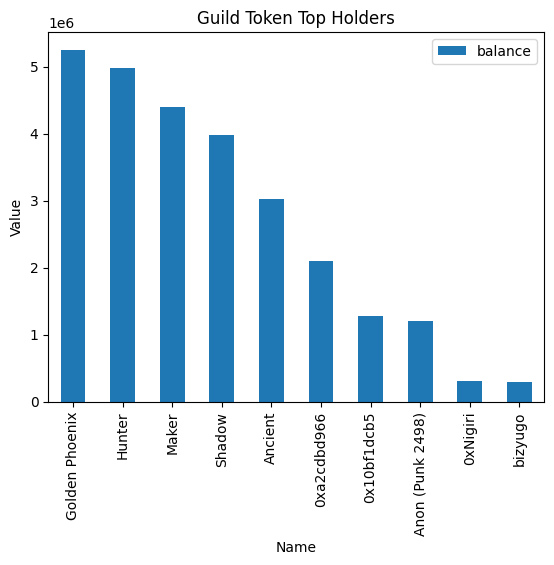

In [ ]:

holder_balances['balance'] = pd.to_numeric(holder_balances['balance'], errors='coerce')
holder_balances = holder_balances.sort_values(by='balance', ascending=False)
holder_balances.plot(kind='bar', x='nickname', y='balance', legend=True)

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Value')
plt.title('Guild Token Top Holders')

# Display the plot
plt.show()